# Setup

In [1]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [2]:
# these are for grouping into the IOD years since the effects are 
# not confined to a single year. You chose this to have an even 
# number of months around the IOD peak..but now you left it in
# line with the SLA plots that start in 06 and end in 05
IODyear_begin = '-06-01' # month-day of IOD year
IODyear_end = '-05-31' # month-day of year AFTER IOD year

bounds_AS = [68,79,3,20]
bounds_wBoB = [79,87,2,21]
bounds_BoB = [87,100,0,23]

#coastal mask bounds 
lat_bounds = [-1.5, 33]
lon_bounds = [48.5, 102.5]

# Get Data

In [3]:
ds_CHL = xr.open_dataset('../data/chl_processed.nc')
ds_CHL

<xarray.Dataset>
Dimensions:           (lat: 828, lon: 1296, month: 12, time: 273)
Coordinates:
  * lon               (lon) float64 48.52 48.56 48.6 48.65 ... 102.4 102.4 102.5
  * lat               (lat) float64 -1.479 -1.438 -1.396 ... 32.9 32.94 32.98
  * time              (time) datetime64[ns] 1997-09-04 1997-10-01 ... 2020-05-01
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mon_chl           (time, lat, lon) float64 ...
    mon_chl_mon_clim  (month, lat, lon) float64 ...
    mon_chl_mon_anom  (time, lat, lon) float64 ...

# Get DMI

In [4]:
# load DMI data
ds_DMI= xr.open_dataset('../data/dmi_processed.nc')

# lists of positive iod years for now taken from sources above 1994-2018 unsure after 2016
posIODyears = list(np.array(ds_DMI.pos_IOD_years)) #[1994,1997,2006,2012,2015]
negIODyears = list(np.array(ds_DMI.neg_IOD_years)) #[1996,1998,2001,2010,2014,2016]
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) # [1995,1999,2000,2002,2003,2004,2005,2007,2008,2009,2011,2012,2013]

sposIODyears = list(np.array(ds_DMI.spos_IOD_years)) 
snegIODyears = list(np.array(ds_DMI.sneg_IOD_years)) 

wposIODyears = list(np.array(ds_DMI.wpos_IOD_years)) 
wnegIODyears = list(np.array(ds_DMI.wneg_IOD_years)) 

ds_DMI

<xarray.Dataset>
Dimensions:          (negyears: 10, neuyears: 40, posyears: 13, snegyears: 6, sposyears: 6, time: 744, wnegyears: 4, wposyears: 7)
Coordinates:
  * time             (time) datetime64[ns] 1958-06-01 1958-07-01 ... 2020-05-01
  * posyears         (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
  * negyears         (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
  * neuyears         (neuyears) int64 1958 1959 1962 1965 ... 2014 2017 2020
  * sposyears        (sposyears) int64 1961 1972 1994 1997 2006 2019
  * snegyears        (snegyears) int64 1960 1964 1970 1996 1998 2016
  * wposyears        (wposyears) int64 1963 1967 1977 1982 2012 2015 2018
  * wnegyears        (wnegyears) int64 1971 1975 1992 2010
Data variables:
    dmi              (time) float64 ...
    dmi_3mo_runmean  (time) float64 ...
    pos_IOD_years    (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
    neg_IOD_years    (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
    neu

In [5]:
var = ds_CHL.mon_chl_mon_anom
# ------------------------------------------------------------#
# Anomaly
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
posIOD_mon_chl_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,posIODyears)

# average over the negative IOD years -------------------------------------------# 
negIOD_mon_chl_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,negIODyears)

# average over the neutral IOD years -------------------------------------------# 
neuIOD_mon_chl_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,neuIODyears)

# ------------------------------------------------------------#
# Strong Anomaly
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
sposIOD_mon_chl_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,sposIODyears)

# average over the positive IOD years -------------------------------------------# 
snegIOD_mon_chl_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,snegIODyears)


# ------------------------------------------------------------#
# Weak Anomaly
# ------------------------------------------------------------#
    
# average over the positive IOD years -------------------------------------------# 
wposIOD_mon_chl_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,wposIODyears)

# average over the positive IOD years -------------------------------------------# 
wnegIOD_mon_chl_mon_anom,_ = IOD_year_group_grid(var,IODyear_begin,IODyear_end,wnegIODyears)


# ------------------------------------------------------------#
# Annual Cycle
# ------------------------------------------------------------#
mon_chl_mon_clim = ds_CHL.mon_chl_mon_clim.roll(month=-5,roll_coords = False)

/home/jennap/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
std_anom = np.array(ds_CHL.mon_chl_mon_anom.std(dim = 'time'))

std_clim = np.array(ds_CHL.mon_chl_mon_clim.std(dim = 'month'))

Text(0.5, 1.0, 'STD of Interannual Anomalies')

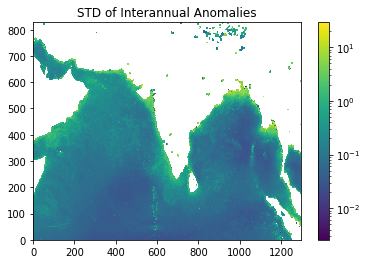

In [7]:
xx,yy = np.meshgrid(ds_CHL.lat,ds_CHL.lon)

plt.pcolor(std_anom,norm=LogNorm())
plt.colorbar()
plt.title('STD of Interannual Anomalies')

Text(0.5, 1.0, 'STD of Annual Cycle')

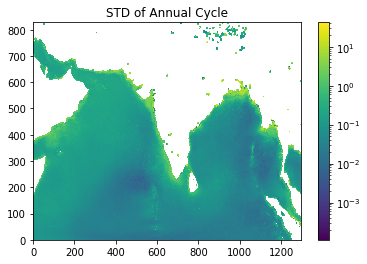

In [8]:
plt.pcolor(std_clim,norm=LogNorm())
plt.colorbar()
plt.title('STD of Annual Cycle')

# subset DMI to CHL years 1997+

In [9]:
time_slice = slice('1997-09-01','2020-05-01')

dmi = ds_DMI['dmi'].sel(time = time_slice)

# Correlate in space

In [10]:
SLOPE = np.full(ds_CHL.mon_chl_mon_anom.shape[1:3],np.nan)
INTERCEPT = np.full(ds_CHL.mon_chl_mon_anom.shape[1:3],np.nan)
R_VALUE = np.full(ds_CHL.mon_chl_mon_anom.shape[1:3],np.nan)
P_VALUE = np.full(ds_CHL.mon_chl_mon_anom.shape[1:3],np.nan)
STD_ERR = np.full(ds_CHL.mon_chl_mon_anom.shape[1:3],np.nan)

n = len(ds_CHL.mon_chl_mon_anom.lat)
m = len(ds_CHL.mon_chl_mon_anom.lon)
with tqdm(total=n * m) as pbar:
    for ii,jj in itertools.product(np.arange(n),np.arange(m)):
        tempvar1 = np.array(ds_CHL.mon_chl_mon_anom[:,ii,jj])
        tempvar2 = np.array(dmi)

        nanmask = ~np.isnan(tempvar1)

        if tempvar1[nanmask].size != 0:
            slope, intercept, r_value, p_value, std_err=stats.linregress(tempvar1[nanmask],tempvar2[nanmask])

            SLOPE[ii,jj] = slope
            INTERCEPT[ii,jj] = intercept
            R_VALUE[ii,jj] = r_value
            P_VALUE[ii,jj] = p_value
            STD_ERR[ii,jj] = std_err

        pbar.update(1)

  0%|          | 1156/1073088 [00:01<15:26, 1157.11it/s]/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
  2%|▏         | 16752/1073088 [00:14<15:13, 1155.91it/s]/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
100%|██████████| 1073088/1073088 [13:30<00:00, 1323.22it/s]


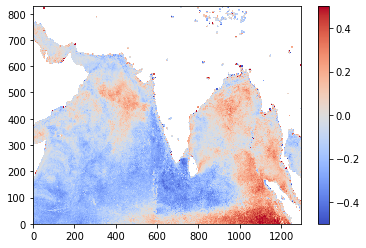

In [14]:
plt.pcolor(R_VALUE, cmap = plt.cm.coolwarm, vmin = -0.5, vmax = 0.5)
plt.colorbar()

In [15]:
xx,yy = np.meshgrid(np.array(ds_CHL.lon),np.array(ds_CHL.lat))

mask = mask_coast(xx.flatten(),yy.flatten(),[35,120,-20,30])
xx = xx.flatten()[mask]
yy = yy.flatten()[mask]

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


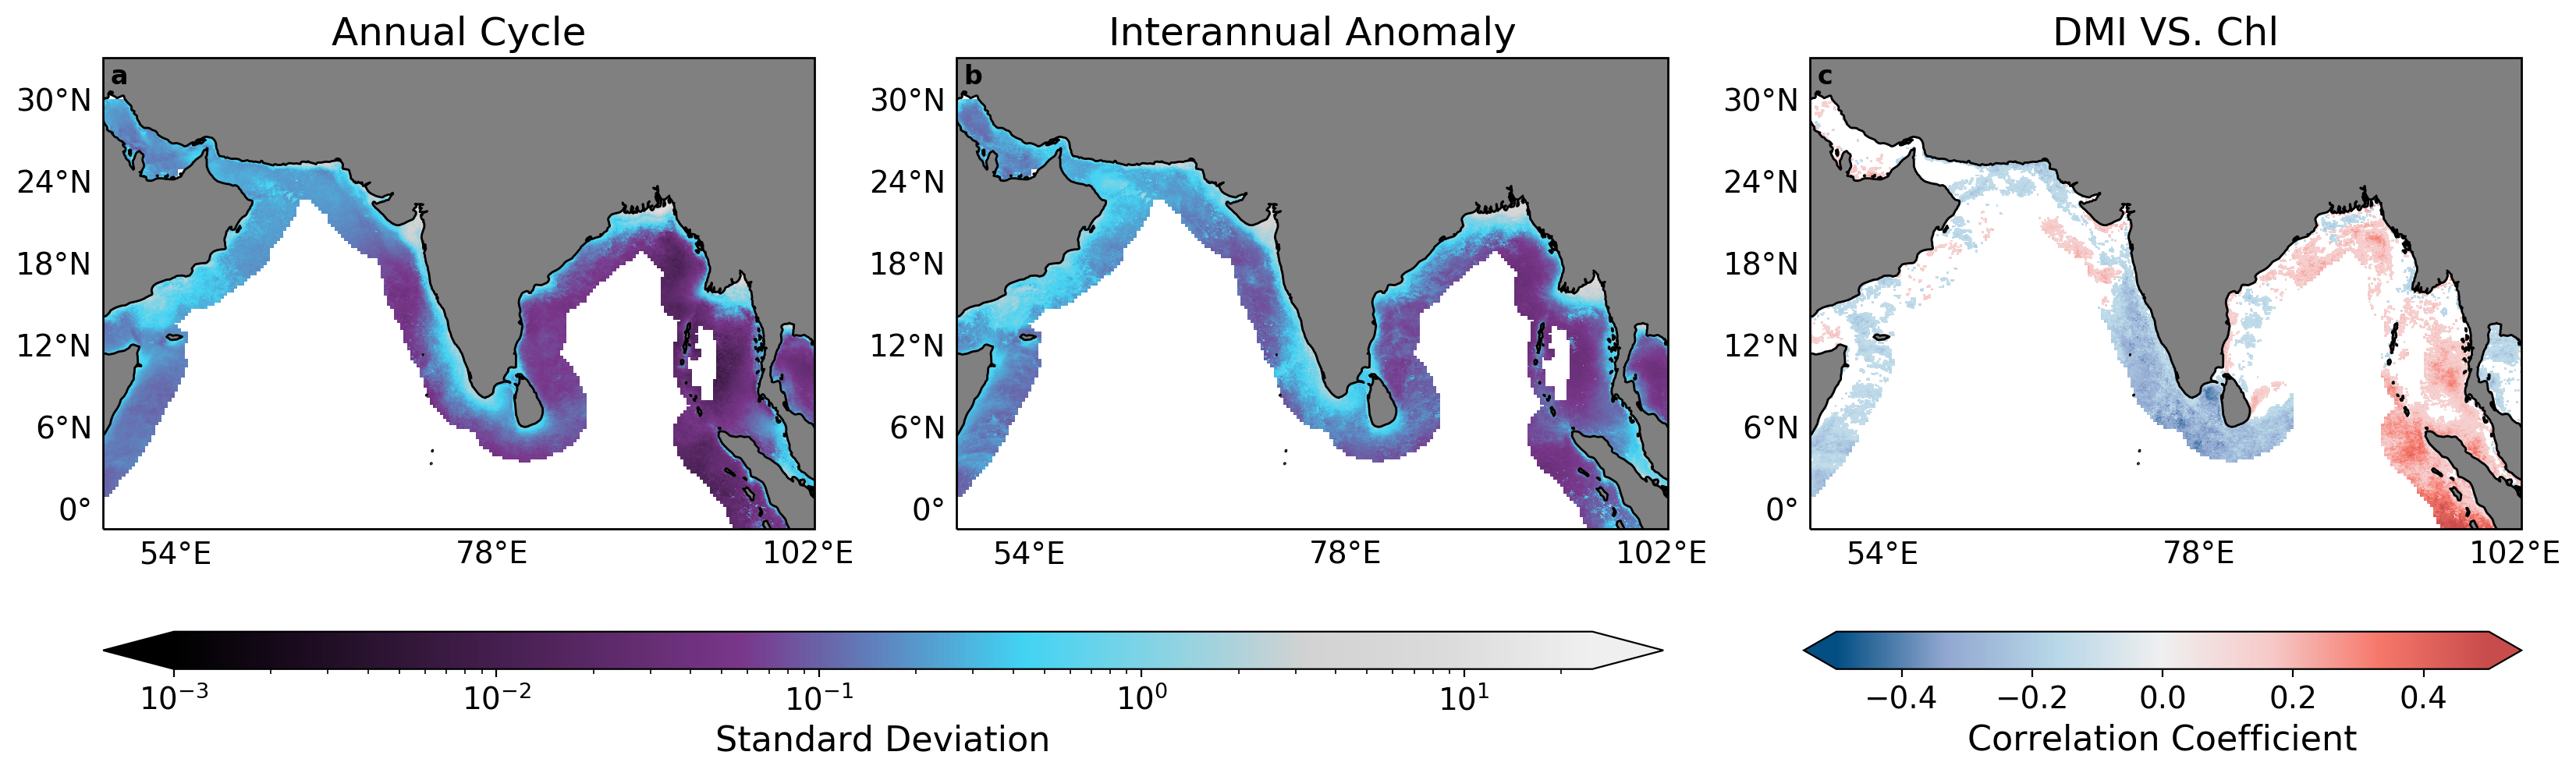

In [16]:
fig = plt.figure(figsize=(20,4),dpi=200)
sz = 1
cmin = 0.001
cmax = 25

cmin_corr = -0.5
cmax_corr = 0.5

cmap = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#D3D3D3','#DcDcDc','#F0F0F0'],
                           [0,0.4,0.6,0.8,0.9,1])

cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

params = {'legend.fontsize': 14,
         'axes.labelsize': 16,
         'axes.titlesize': 18,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
tmp = std_clim.flatten()[mask]
pann = ax.scatter(xx,yy,c = tmp,marker='s',s= sz,linewidth=0,norm=LogNorm(),
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
ax.set_title('Annual Cycle')
# g = add_land(ax, countries = True, rivers = True)
g = add_land(ax)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 14}
g.ylabel_style = {'size': 14}
add_letter(ax, 'a')

ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
tmp = std_anom.flatten()[mask]
p = ax.scatter(xx,yy,c = tmp,marker='s',s= sz,linewidth=0,norm=LogNorm(),
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
ax.set_title('Interannual Anomaly')
# g = add_land(ax, countries = True, rivers = True)
g = add_land(ax)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 14}
g.ylabel_style = {'size': 14}
add_letter(ax, 'b')

ax = fig.add_subplot(133,projection= ccrs.PlateCarree())
tmp = R_VALUE.flatten()[mask]
hatch_var = P_VALUE.flatten()[mask]
hatch_mask = hatch_var <= 0.5
# p = ax.scatter(xx,yy,c = tmp,marker='s',s= sz,linewidth=0,
#                       cmap=cmap2,vmin=cmin_corr,vmax=cmax_corr,transform=ccrs.PlateCarree())
p2 = ax.scatter(xx[hatch_var <= 0.05],yy[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
                      cmap=cmap2,vmin=cmin_corr,vmax=cmax_corr,transform=ccrs.PlateCarree())
# ax.scatter(xx[hatch_mask],yy[hatch_mask],c = tmp[hatch_mask],marker='s',s= sz,linewidth=0,
#                       cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
ax.set_title('DMI VS. Chl')
# g = add_land(ax, countries = True, rivers = True)
g = add_land(ax)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 14}
g.ylabel_style = {'size': 14}
add_letter(ax, 'c')

cbar_ax = fig.add_axes([0.125, -0.1, 0.5, 0.06])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', extend = 'both')
cbar.set_label('Standard Deviation', fontsize = 16)

cbar_ax = fig.add_axes([0.67, -0.1, 0.23, 0.06])
cbar_anom = fig.colorbar(p2,cax=cbar_ax, pad=0.04, orientation = 'horizontal', extend = 'both')
cbar_anom.set_label('Correlation Coefficient', fontsize = 16)


In [33]:
np.nanmin(SLOPE)

-100.24916769748828

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in less_equal


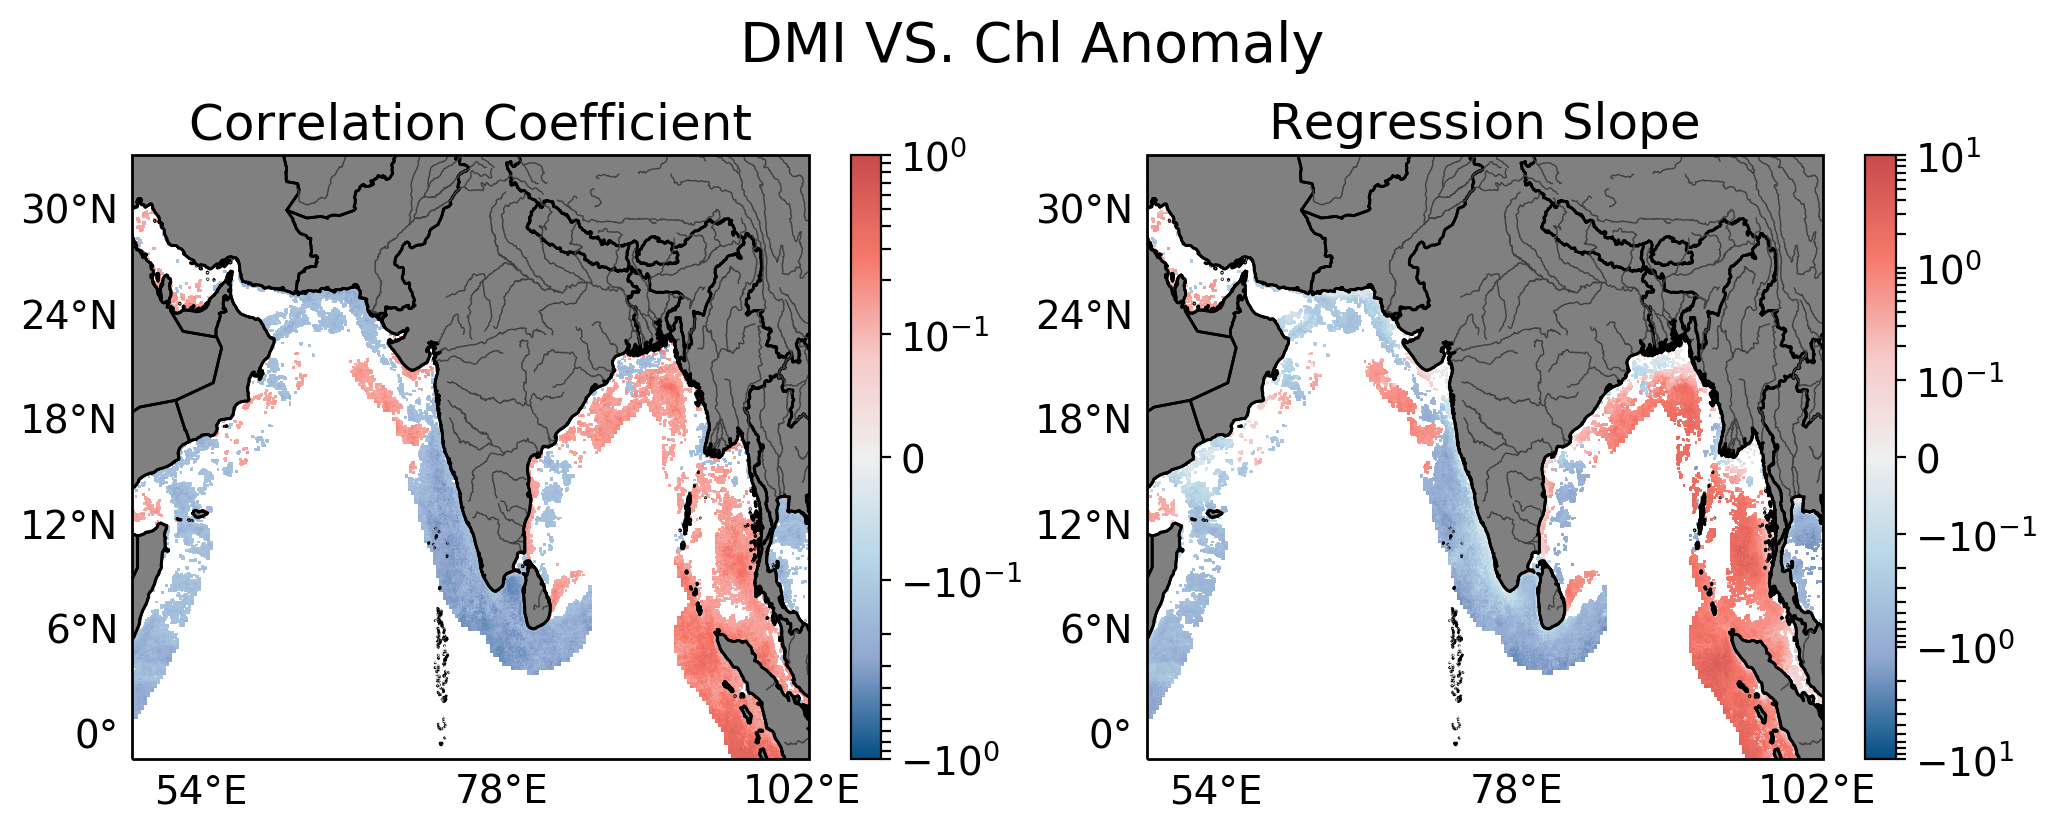

In [48]:
fig = plt.figure(figsize=(12,4),dpi=200)
sz = 1
cmin_slope = -10
cmax_slope = 10

cmin_corr = -1
cmax_corr = 1

cmap = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#D3D3D3','#DcDcDc','#F0F0F0'],
                           [0,0.4,0.6,0.8,0.9,1])

cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

params = {'legend.fontsize': 14,
         'axes.labelsize': 16,
         'axes.titlesize': 18,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
pylab.rcParams.update(params)

##############################################################
ax = fig.add_subplot(121,projection= ccrs.PlateCarree())
tmp = R_VALUE.flatten()[mask]
hatch_var = P_VALUE.flatten()[mask]
hatch_mask = hatch_var <= 0.5
# p = ax.scatter(xx,yy,c = tmp,marker='s',s= sz,linewidth=0,
#                       cmap=cmap2,vmin=cmin_corr,vmax=cmax_corr,transform=ccrs.PlateCarree())
p = ax.scatter(xx[hatch_var <= 0.05],yy[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),
               norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
# ax.scatter(xx[hatch_mask],yy[hatch_mask],c = tmp[hatch_mask],marker='s',s= sz,linewidth=0,
# ax.scatter(xx[hatch_mask],yy[hatch_mask],c = tmp[hatch_mask],marker='s',s= sz,linewidth=0,
#                       cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
ax.set_title('Correlation Coefficient')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 14}
g.ylabel_style = {'size': 14}
plt.colorbar(p,ax=ax)

ax = fig.add_subplot(122,projection= ccrs.PlateCarree())
tmp = SLOPE.flatten()[mask]
hatch_var = P_VALUE.flatten()[mask]
hatch_mask = hatch_var <= 0.5
# p = ax.scatter(xx,yy,c = tmp,marker='s',s= sz,linewidth=0,
#                       cmap=cmap2,vmin=cmin_corr,vmax=cmax_corr,transform=ccrs.PlateCarree())
p = ax.scatter(xx[hatch_var <= 0.05],yy[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),
              norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_slope,vmax=cmax_slope))
# ax.scatter(xx[hatch_mask],yy[hatch_mask],c = tmp[hatch_mask],marker='s',s= sz,linewidth=0,
#                       cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
ax.set_title('Regression Slope')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 14}
g.ylabel_style = {'size': 14}
plt.colorbar(p,ax=ax)

plt.suptitle('DMI VS. Chl Anomaly', fontsize = 20, y =1.05);

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.


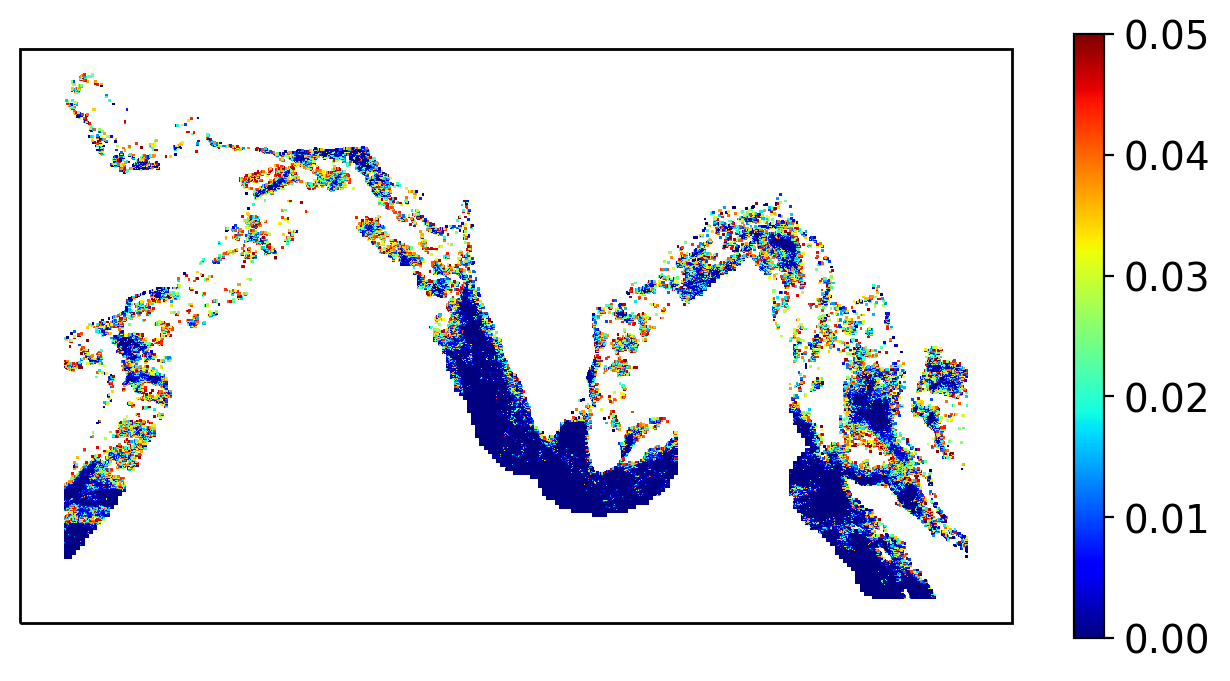

In [21]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
hatch_var = P_VALUE.flatten()[mask]
p=ax.scatter(xx[hatch_var <= 0.05],yy[hatch_var <= 0.05],c = hatch_var[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
                      cmap=plt.cm.jet,vmin=0,vmax=0.05,transform=ccrs.PlateCarree())
plt.colorbar(p,ax=ax)

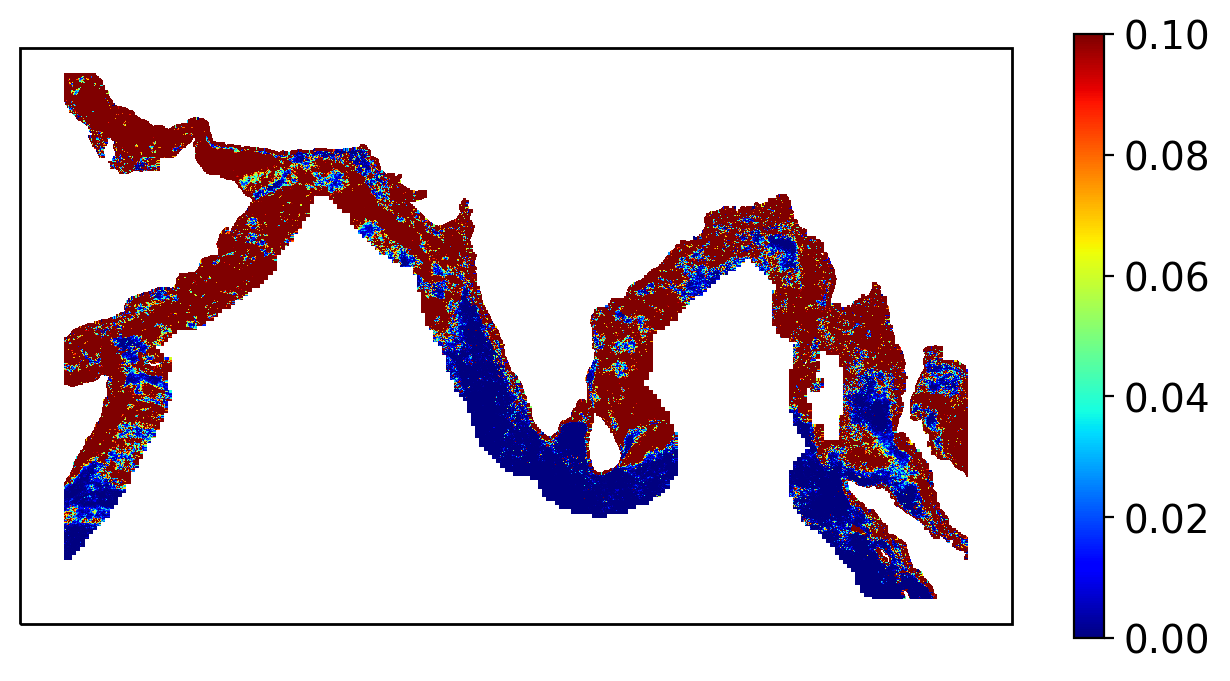

In [24]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111,projection= ccrs.PlateCarree())
hatch_var = P_VALUE.flatten()[mask]
p=ax.scatter(xx,yy,c = hatch_var,marker='s',s= sz,linewidth=0,
                      cmap=plt.cm.jet,vmin=0,vmax=0.1,transform=ccrs.PlateCarree())
plt.colorbar(p,ax=ax)